# Results
- Models used with hyperparameters <br>
<br> 1. Logistic Regression, Hyperparameter = penalty, C, l1, l2
<br> 2. Logistic Regression, Hyperparameter = penalty, C, elasticnet
<br> 3. KNN Classification, Hyperparameters = No. of neighbors
<br> 4. Decision Tree, Hyperparameters = Max_Leaf_Nodes 
<br> 5. Decision Tree, Hyperparameters = Max_Depth of tree 
<br> 6. SVM Classification: Linear, Hyperparameters = C, and gamma
<br> 7. SVM Classification - Kernel : rbf, Hyperparameters = C, and gamma
<br> 8. SVM Classification - Kernel : Sigmoid, Hyperparameters = C, and gamma 
<br> 9. SVM Classification - Kernel : Poly, Hyperparameters = C, degree
<br>10. Two models with Bagging  (Decision tree and Logistic regression)
<br>11. Two models with Pasting  (Decision tree and Logistic regression)
<br>12. Random Forest 
<br>13. Ada Boost
<br>14. GradientBoost
<br>15. Extra-Trees
<br>16. XGBoost
    
<br> Best model based on Scoring Method = Accuracy:   
<br> The best model choosen based on CV score (0.84) is :Logistic Regression.
<br> The parameters for this model are {'C': 1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}          

<br> The test score of best model is 0.84
<br> The train score of best model is 0.84
   
<br>Best Model parameters

(I got two models Decision tree using pasting and XG Boost which have test score of 0.856 and 0.851 respectively.
I chose XGBoost model for prediction)
<br>
<br>Best model based on cross validation score : XGBoost
 
<br>Best learning_rate : 0.1
<br>Best max_depth : 6
<br>Best min_child_weight : 7
<br>Best n_estimators : 150
<br>Best subsample : 0.9
    
Best Mean Cross-validation score of XGBoost : 0.85

<br>Test score of best model

- XGBoost Performance - Test:  0.8334

<br>Train score of best model

- XGBoost Performance - Train:  0.8951

<br>Train and Test Errors

train mse: 0.08614232209737828
train rmse: 0.2935001228234467

test mse: 0.1011
test rmse: 0.31799

<br>Prediction on test data

- final_best_model.score(X_test,y_test)
- 0.8334


In [ ]:
!pip install feature-engine

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [41]:
data = pd.read_csv('C:/Users/Adithya Arunganesh/Desktop/Machine Learning/HW3/titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [45]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [46]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [47]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [48]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [49]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [50]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
the            1
Don.           1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Jonkheer.      1
Mme.           1
Name: Title, dtype: int64

In [51]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [52]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [53]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [54]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [55]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [56]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [57]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     801 non-null    int64  
 1   Sex        801 non-null    object 
 2   Age        643 non-null    float64
 3   SibSp      801 non-null    int64  
 4   Parch      801 non-null    int64  
 5   Fare       801 non-null    float64
 6   Embarked   799 non-null    object 
 7   Cabin_num  175 non-null    float64
 8   Cabin_cat  179 non-null    object 
 9   Title      801 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [59]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler


In [60]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.CategoricalVariableImputer(imputation_method='missing',variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables = ['Fare','Age','Cabin_num'])),

])

In [61]:
titanic_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 CategoricalVariableImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True,
                                          variables=['Sex', 'Embarked',
                                                     'Cabin_cat', 'Title'])),
              

In [62]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

## LogisticRegression

In [64]:
# Train a logistic regression model

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(max_iter=10000)

#define a list of parameters
param_grid = [{'penalty': ['l1','l2'],
              'C':[0.1, 0.001, 1, 10],
              'solver' : ['liblinear', 'saga']},

              {'penalty': ['elasticnet'],
              'C':[0.1, 0.001, 1, 10],
              'l1_ratio': [0.1,0.5, 0.9],
              'solver' : ['saga']}]

grid_log = GridSearchCV(clf, param_grid, cv=6, verbose=0)

grid_log.fit(X_train, y_train)


print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))
print()

#find best parameters
print('Logistic Regression parameters: ', grid_log.best_params_)

# Check test data set performance
print("Logistic Train Performance: ", grid_log.score(X_train,y_train))
print("Logistic Test Performance: ", grid_log.score(X_test,y_test))



Best Mean Cross-validation score: 0.84

Logistic Regression parameters:  {'C': 1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic Train Performance:  0.8377028714107366
Logistic Test Performance:  0.8444444444444444


## KNN

In [66]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k



from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(2,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=9, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.82

KNN parameters:  {'n_neighbors': 5}
KNN Train Performance:  0.8726591760299626
KNN Test Performance:  0.8222222222222222


## Decision tree with Max_leaf_nodes

In [67]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_leaf_nodes': range(3,36),
               'criterion': ['gini', 'entropy'],
               'splitter': ['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_leaf_nodes': 19, 'splitter': 'best'}
Decision Tree Performance Train:  0.8651685393258427
Decision Tree Performance Test:  0.8111111111111111


Decision tree with Max Depth

In [68]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': [1,2,3,4,5,6],
               'criterion': ['gini', 'entropy'],
               'splitter': ['best','random']},

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=6, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance Train: ", grid_dtree.score(X_train,y_train))
print("Decision Tree Performance Test: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
Decision Tree Performance Train:  0.8564294631710362
Decision Tree Performance Test:  0.8222222222222222


## SVM Classification - Linear

In [69]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svc_linear = LinearSVC(dual = False, max_iter=10000)

#define a list of parameters
param_svc_linear = {'penalty': ['l1','l2'],
                    'C': [0.08,0.09,0.1, 0.2,0.3,0.4,0.5],
                   }

#apply grid search
grid_param_svc_linear = GridSearchCV(svc_linear, param_svc_linear, cv=4, return_train_score = True)
grid_param_svc_linear.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc_linear.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc_linear.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svc_linear.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc_linear.score(X_test,y_test))

Best Mean Cross-validation score: 0.83

SVC parameters:  {'C': 0.3, 'penalty': 'l1'}
SVC Performance train:  0.8377028714107366
SVC Performance test:  0.8444444444444444


## SVM Classification Kernel:rbf

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_kernel = SVC(kernel = 'rbf')

#define a list of parameters
param_svc_kernel = {'C': [15000,25000,30000],'gamma':[0.0008,0.001,0.003,0.005]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))

Best Mean Cross-validation score: 0.83
SVC parameters:  {'C': 25000, 'gamma': 0.001}
train score:  0.8401997503121099
test score:  0.8401997503121099


## SVM Classification Kernel: Sigmoid

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_kernel = SVC(kernel = 'sigmoid')

#define a list of parameters
param_svc_kernel = {'C': [1.2,1.4,1.6,1.8],'gamma':[0.08,0.1,0.3,0.5]}

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv=5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc_kernel.best_score_))


#find best parameters
print('SVC parameters: ', grid_svc_kernel.best_params_)

print('train score: ', grid_svc_kernel.score(X_train, y_train))
print('test score: ', grid_svc_kernel.score(X_train, y_train))

Best Mean Cross-validation score: 0.80
SVC parameters:  {'C': 1.6, 'gamma': 0.1}
train score:  0.8077403245942572
test score:  0.8077403245942572


## SVM Classification with Poly kernel

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()

#define a list of parameters
param_svc = {'kernel': ['poly'],  
             'C': [0.1,1,2,4,6,8], 
             'degree': [2, 3,5,6,7]}
             

#apply grid search
grid_param_svc = GridSearchCV(svc, param_svc, cv=6, return_train_score = True, scoring='accuracy')
grid_param_svc.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_param_svc.best_score_))
print()

#find best parameters
print('SVC parameters: ', grid_param_svc.best_params_)



# Check test data set performance
print("SVC Performance train: ", grid_param_svc.score(X_train,y_train))
print("SVC Performance test: ", grid_param_svc.score(X_test,y_test))

Best Mean Cross-validation score: 0.84

SVC parameters:  {'C': 2, 'degree': 5, 'kernel': 'poly'}
SVC Performance train:  0.8626716604244694
SVC Performance test:  0.8333333333333334


Ensemble Model

In [143]:
import warnings
warnings.filterwarnings('ignore')

1.	Two models with Bagging (best model from HW2 and Decision Tree)

In [73]:
from sklearn.ensemble import BaggingClassifier

In [144]:
bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_tree_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_tree_grid = GridSearchCV(bag_tree, bag_tree_param,cv=10, return_train_score=True )
bag_tree_grid.fit(X_train,y_train)


GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [198]:
print(f'Best Mean Cross Validation Score is {bag_tree_grid.best_score_}')
print(f'Best parameters are {bag_tree_grid.best_params_}')
print(f'Train score is {bag_tree_grid.score(X_train,y_train)}')
print(f'Test score is {bag_tree_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8502314814814815
Best parameters are {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9238451935081149
Test score is 0.8111111111111111


In [146]:
bag_logreg = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True, random_state=0, oob_score=True)

bag_logreg_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [100,500]}
bag_logreg_grid = GridSearchCV(bag_logreg, bag_logreg_param,cv=10, return_train_score=True )
bag_logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         oob_score=True, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1], 'n_estimators': [100, 500]},
             return_train_score=True)

In [103]:
print(f'Best Mean Cross Validation Score is {bag_logreg_grid.best_score_}')
print(f'Best parameters are {bag_logreg_grid.best_params_}')
print(f'Train score is {bag_logreg_grid.score(X_train,y_train)}')
print(f'Test score is {bag_logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8302623456790122
Best parameters are {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.8401997503121099
Test score is 0.8333333333333334


2.	Two models with Pasting (best model from HW2 and Decision Tree)

In [93]:
paste_tree=BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_tree_param={
                   'base_estimator__max_depth':range(1,10),
                    'max_samples':[0.8,1],
                    'n_estimators':[10,20,100]}

paste_tree_grid=GridSearchCV(paste_tree,paste_tree_param, cv=10, return_train_score=True)

paste_tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__max_depth': range(1, 10),
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 20, 100]},
             return_train_score=True)

In [94]:
print(f'Best Mean Cross Validation Score is {paste_tree_grid.best_score_}')
print(f'Best parameters are {paste_tree_grid.best_params_}')
print(f'Train score is {paste_tree_grid.score(X_train,y_train)}')
print(f'Test score is {paste_tree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8564660493827161
Best parameters are {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9350811485642946
Test score is 0.8222222222222222


In [147]:
paste_logreg = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False, random_state=0, oob_score=False)

paste_logreg_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_logreg_grid = GridSearchCV(paste_logreg, paste_logreg_param,cv=5, return_train_score=True, )
paste_logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         bootstrap=False, random_state=0),
             param_grid={'base_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_samples': [0.8, 1],
                         'n_estimators': [10, 25, 100]},
             return_train_score=True)

In [126]:
print(f'Best Mean Cross Validation Score is {paste_logreg_grid.best_score_}')
print(f'Best parameters are {paste_logreg_grid.best_params_}')
print(f'Train score is {paste_logreg_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8302406832298136
Best parameters are {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8401997503121099
Test score is 0.8444444444444444


3.	Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf =RandomForestClassifier(random_state=42)
rf_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(rf, rf_param,cv=5, return_train_score=True)
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [97]:
print(f'Best Mean Cross Validation Score is {rf_grid.best_score_}')
print(f'Best parameters are {rf_grid.best_params_}')
print(f'Train score is {rf_grid.score(X_train,y_train)}')
print(f'Test score is {rf_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8377251552795031
Best parameters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.885143570536829
Test score is 0.8666666666666667


4.	Ada Boost (with decision tree)

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
adc_tree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_tree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [0.1,2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,1.0,2],
             }
adc_tree_grid = GridSearchCV(adc_tree, adc_tree_param,cv=5, return_train_score=True)
adc_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=42),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [0.1, 2, 4, 6],
                         'base_estimator__splitter': ['best', 'random'],
                         'learning_rate': [0.1, 0.5, 1.0, 2],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [101]:
print(f'Best Mean Cross Validation Score is {adc_tree_grid.best_score_}')
print(f'Best Parameters are {adc_tree_grid.best_params_}')
print(f'Train score is {adc_tree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_tree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.816467391304348
Best Parameters are {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'random', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9001248439450686
Test score is 0.7777777777777778


5.	Gradient Boost

In [105]:
from  sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier(random_state=42)
gb_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gb_grid = GridSearchCV(gb, gb_param,cv=5, return_train_score=True, )
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 2], 'max_depth': [2, 3, 4],
                         'n_estimators': [100, 150]},
             return_train_score=True)

In [106]:
print(f'Best Mean Cross Validation Score is {gb_grid.best_score_}')
print(f'Best parameters are {gb_grid.best_params_}')
print(f'Train score is {gb_grid.score(X_train,y_train)}')
print(f'Test score is {gb_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.820248447204969
Best parameters are {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9238451935081149
Test score is 0.8444444444444444


6.	Extra-Trees

In [113]:
from  sklearn.ensemble import ExtraTreesClassifier

In [114]:
et= ExtraTreesClassifier(random_state=42)
et_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
et_grid = GridSearchCV(et, et_param,cv=5, return_train_score=True, )
et_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score=True)

In [115]:
print(f'Best Mean Cross Validation Score is {et_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {et_grid.best_params_}')
print(f'Train score is {et_grid.score(X_train,y_train)}')
print(f'Test score is {et_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8314673913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8739076154806492
Test score is 0.8333333333333334


7.	XGBoost

In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [108]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgb_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgb_grid = GridSearchCV(xgb, xgb_param,cv=5, return_train_score=True )
xgb_grid.fit(X_train,y_train)

In [111]:
print(f'Best Mean Cross Validation Score is {xgb_grid.best_score_}')
print(f'Best parameters are {xgb_grid.best_params_}')
print(f'Train score is {xgb_grid.score(X_train,y_train)}')
print(f'Test score is {xgb_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8514052795031055
Best parameters are {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.9}
Train score is 0.8951310861423221
Test score is 0.8333333333333334


Summary

8.	Predict your outcome on test or validation data for all the models

In [199]:
classifiers={'knn':grid_knn,
             'clf':grid_log,
             'svc_linear':grid_param_svc_linear,
             'svc_kernel':grid_svc_kernel,
             'dtree':grid_dtree,
             'bag_tree':bag_tree_grid,
             'bag_logreg':bag_logreg_grid,
             'paste_tree': paste_tree_grid,
             'paste_logreg': paste_logreg_grid,
             'rf': rf_grid,
             'et': et_grid,
             'adc_tree':adc_tree_grid,
             'gb': gb_grid,
             'xgb': xgb_grid}

In [200]:
classifiers.keys()

dict_keys(['knn', 'clf', 'svc_linear', 'svc_kernel', 'dtree', 'bag_tree', 'bag_logreg', 'paste_tree', 'paste_logreg', 'rf', 'et', 'adc_tree', 'gb', 'xgb'])

In [201]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [202]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
7,paste_tree,0.856466,0.033926
13,xgb,0.851405,0.024005
5,bag_tree,0.850231,0.039314
4,dtree,0.840198,0.028300
9,rf,0.837725,0.021821
11,adc_tree,0.837694,0.023440
1,clf,0.835250,0.026020
2,svc_linear,0.831499,0.031848
10,et,0.831467,0.018472
6,bag_logreg,0.830262,0.038530


9.	Create a correlation matrix using prediction from all the models

In [137]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    
    best_model = value.best_estimator_
    predictions = best_model.predict(X_test)
    predictions_all[key] = predictions

In [142]:
pred=pd.DataFrame(predictions_all)

Text(0.5, 1, 'correlation of the test labels')

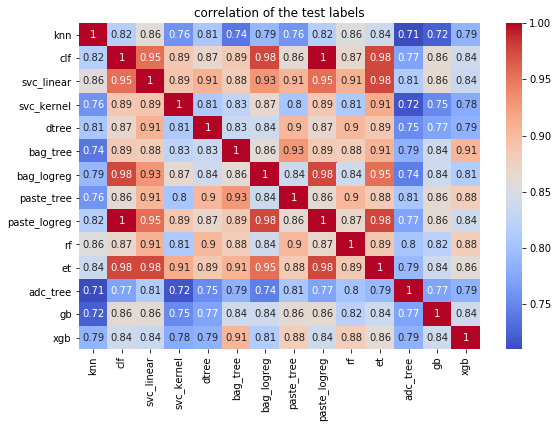

In [148]:
#Correlation map

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(9,6))

heatmap=sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
heatmap.set_title('correlation of the test labels')


In [151]:
def get_redundant_pairs(df):
    '''get diagonal and lower trinagular pairs of correlation matrix'''
    pairs_to_drop=set()
    cols=df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=get_redundant_pairs(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]
        

In [152]:
print('Bottom Absolute Correlations')
print(get_bottom_abs_correlations(pred,5))

Bottom Absolute Correlations
knn         adc_tree    0.710043
svc_kernel  adc_tree    0.716306
knn         gb          0.723218
            bag_tree    0.738719
bag_logreg  adc_tree    0.744581
dtype: float64


10.	Use Voting Classifier to combine results of top 5 models (all the models including models you ran for HW2.

In [153]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vote=VotingClassifier(estimators=
                     [('paste_tree', paste_tree_grid.best_estimator_),
                        ('xgb',xgb_grid.best_estimator_),
                         ('bag_tree',bag_tree_grid.best_estimator_),
                          ('dtree',grid_dtree.best_estimator_),
                           ('rf',rf_grid.best_estimator_)])

vote_param={ 'voting':['hard', 'soft']}

vote_grid=GridSearchCV(vote, vote_param, cv=5, return_train_score=True)

vote_grid.fit(X_train, y_train)

In [204]:
print(f'Best Mean Cross Validation Score is {vote_grid.best_score_}')
print(f'Best parameters are {vote_grid.best_params_}')
print(f'Train score is {vote_grid.score(X_train,y_train)}')
print(f'Test score is {vote_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8414518633540373
Best parameters are {'voting': 'hard'}
Train score is 0.9051186017478152
Test score is 0.8333333333333334


11.	Use Voting Classifier to combine results of 5 models with least correlation.

In [210]:
vote_l=VotingClassifier(estimators=
                     [('adc_tree', adc_tree_grid.best_estimator_), 
                               
                               ('knn', grid_knn.best_estimator_)])

vote_l_param={ 'voting':['hard', 'soft']}

vote_l_grid=GridSearchCV(vote_l, vote_l_param, cv=5, return_train_score=True)

vote_l_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('adc_tree',
                                                     AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                                        learning_rate=0.1,
                                                                        n_estimators=150,
                                                                        random_state=42)),
                                                    ('knn',
                                                     KNeighborsClassifier())]),
             param_grid={'voting': ['hard', 'soft']}, return_train_score=True)

In [211]:
print(f'Best Mean Cross Validation Score is {vote_l_grid.best_score_}')
print(f'Best parameters are {vote_l_grid.best_params_}')
print(f'Train score is {vote_l_grid.score(X_train,y_train)}')
print(f'Test score is {vote_l_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.831475155279503
Best parameters are {'voting': 'hard'}
Train score is 0.8739076154806492
Test score is 0.8111111111111111


12.	Use Stacking Classifier to combine results of top 5 models (all the models including models you ran for HW2)

In [167]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack=StackingClassifier(estimators=
                     [('paste_tree', paste_tree_grid.best_estimator_),
                        ('xgb',xgb_grid.best_estimator_),
                         ('bag_tree',bag_tree_grid.best_estimator_),
                          ('dtree',grid_dtree.best_estimator_),
                           ('rf',rf_grid.best_estimator_)], final_estimator=LogisticRegression())

stack_param={
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }

stack_grid=GridSearchCV(stack, stack_param, cv=4, return_train_score=True)
                          
stack_grid.fit(X_train, y_train)                            

In [174]:
print(f'Best Mean Cross Validation Score is {stack_grid.best_score_}')
print(f'Best parameters are {stack_grid.best_params_}')
print(f'Train score is {stack_grid.score(X_train,y_train)}')
print(f'Test score is {stack_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8339800995024875
Best parameters are {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9063670411985019
Test score is 0.8333333333333334


13.	Use Stacking Classifier to combine results of models with least correlation.

In [207]:
stack_l = StackingClassifier(estimators=
                              [('adc_tree', adc_tree_grid.best_estimator_), 
                               ('svc_kernel',grid_svc_kernel.best_estimator_),
                               ('knn', grid_knn.best_estimator_)
                                                             ], 
                        final_estimator=LogisticRegression())
stack_l_param = {
              'final_estimator__C': [0.001,0.01,0.1,1,10,100],
              'final_estimator__penalty': ['l1','l2']
             }
stack_l_grid = GridSearchCV(stack_l, stack_l_param,cv=5, return_train_score=True, )
stack_l_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('adc_tree',
                                                       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                                          learning_rate=0.1,
                                                                          n_estimators=150,
                                                                          random_state=42)),
                                                      ('svc_kernel',
                                                       SVC(C=1.6, gamma=0.1,
                                                           kernel='sigmoid')),
                                                      ('knn',
                                                       KNeighborsClassifier())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.001, 0.01, 

In [208]:
print(f'Best Mean Cross Validation Score is {stack_l_grid.best_score_}')
print(f'Best parameters are {stack_l_grid.best_params_}')
print(f'Train score is {stack_l_grid.score(X_train,y_train)}')
print(f'Test score is {stack_l_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8377251552795031
Best parameters are {'final_estimator__C': 1, 'final_estimator__penalty': 'l2'}
Train score is 0.8614232209737828
Test score is 0.8666666666666667


Prediction on Test Data using best model

I got two models Decision tree using pasting and XG Boost which have test score of 0.856 and 0.851 respectively.
I chose XGBoost model for prediction

In [ ]:
best_model = XGBClassifier(learning_rate = 0.1,max_depth = 6,min_child_weight =7, n_estimators =150,subsample =0.9)
best_model.fit(X_train,y_train)

In [187]:
best_model.score(X_test,y_test)

0.8333333333333334

In [190]:
X_train_pred = best_model.predict(X_train)
X_test_pred  = best_model.predict(X_test)

In [191]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('train mse: {}'.format(mean_squared_error(y_train, X_train_pred)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_pred))))
print('train r2: {}'.format(r2_score(y_train, X_train_pred)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_pred)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_pred))))
print('test r2: {}'.format(r2_score(y_test, X_test_pred)))

print("Test Performance: ", best_model.score(X_test,y_test))
print("Train Performance: ", best_model.score(X_train,y_train))

train mse: 0.10112359550561797
train rmse: 0.317999364001908
train r2: 0.5700226649170941

test mse: 0.16666666666666666
test rmse: 0.408248290463863
test r2: 0.32126696832579194
Test Performance:  0.8333333333333334
Train Performance:  0.898876404494382
